<img src="https://roost.nbcuni.com/bin/viewasset.html/content/dam/Peacock/Campaign/landingpages/library/theoffice/mainpage/office-social-min.png/_jcr_content/renditions/original" width=1000 height=400 />

In [1]:
library("tidyverse")
library("dplyr")
library("ggrepel")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this final project, we will explore the Tidy Tuesday data set "theoffice_ratings" from March 2020. This CSV file contains all of the sitcom The Office's episode titles, their corresponding season, air date, total votes, and IMDB rating( rated out of 10, 10 being the highest). The Office was a hit sitcom on NBC in the mid 2000s to early 2010s and starred Michael Scott, regional manager of the small paper company Dunder Mufflin. Episodes were filmed in a documentary style and featured the daily mishaps of the company and the lives of its employees.We will see if the show got better or worse (determined by IMDB ratings) after Michael left in season 7's "Goodbye, Michael". 
To begin, we'll start by exploring the data and making a line graph to show how ratings have changed over the entire show. The line graph will also allow us to indicate which episode Michael left in.Then we will look at each season's ratings through boxplots to find outliers and median ratings.Finally we'll compare the average rating for all the episodes Michael was in and the average rating for the episodes Michael wasn't in. 

In [47]:
#reading in the data
theoffice = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-17/office_ratings.csv",
                    col_types = cols())

In [48]:
# quick glimpse of data 
print(theoffice)

# A tibble: 188 × 6
   season episode title             imdb_rating total_votes air_date  
    <dbl>   <dbl> <chr>                   <dbl>       <dbl> <date>    
 1      1       1 Pilot                     7.6        3706 2005-03-24
 2      1       2 Diversity Day             8.3        3566 2005-03-29
 3      1       3 Health Care               7.9        2983 2005-04-05
 4      1       4 The Alliance              8.1        2886 2005-04-12
 5      1       5 Basketball                8.4        3179 2005-04-19
 6      1       6 Hot Girl                  7.8        2852 2005-04-26
 7      2       1 The Dundies               8.7        3213 2005-09-20
 8      2       2 Sexual Harassment         8.2        2736 2005-09-27
 9      2       3 Office Olympics           8.4        2742 2005-10-04
10      2       4 The Fire                  8.4        2713 2005-10-11
# … with 178 more rows


In [49]:
#Altering the data to fit our purposes
#Making season a character varible rather than a numeric to help with our graphs
theoffice  = theoffice  %>%  
             mutate(season = as.character(season)) 

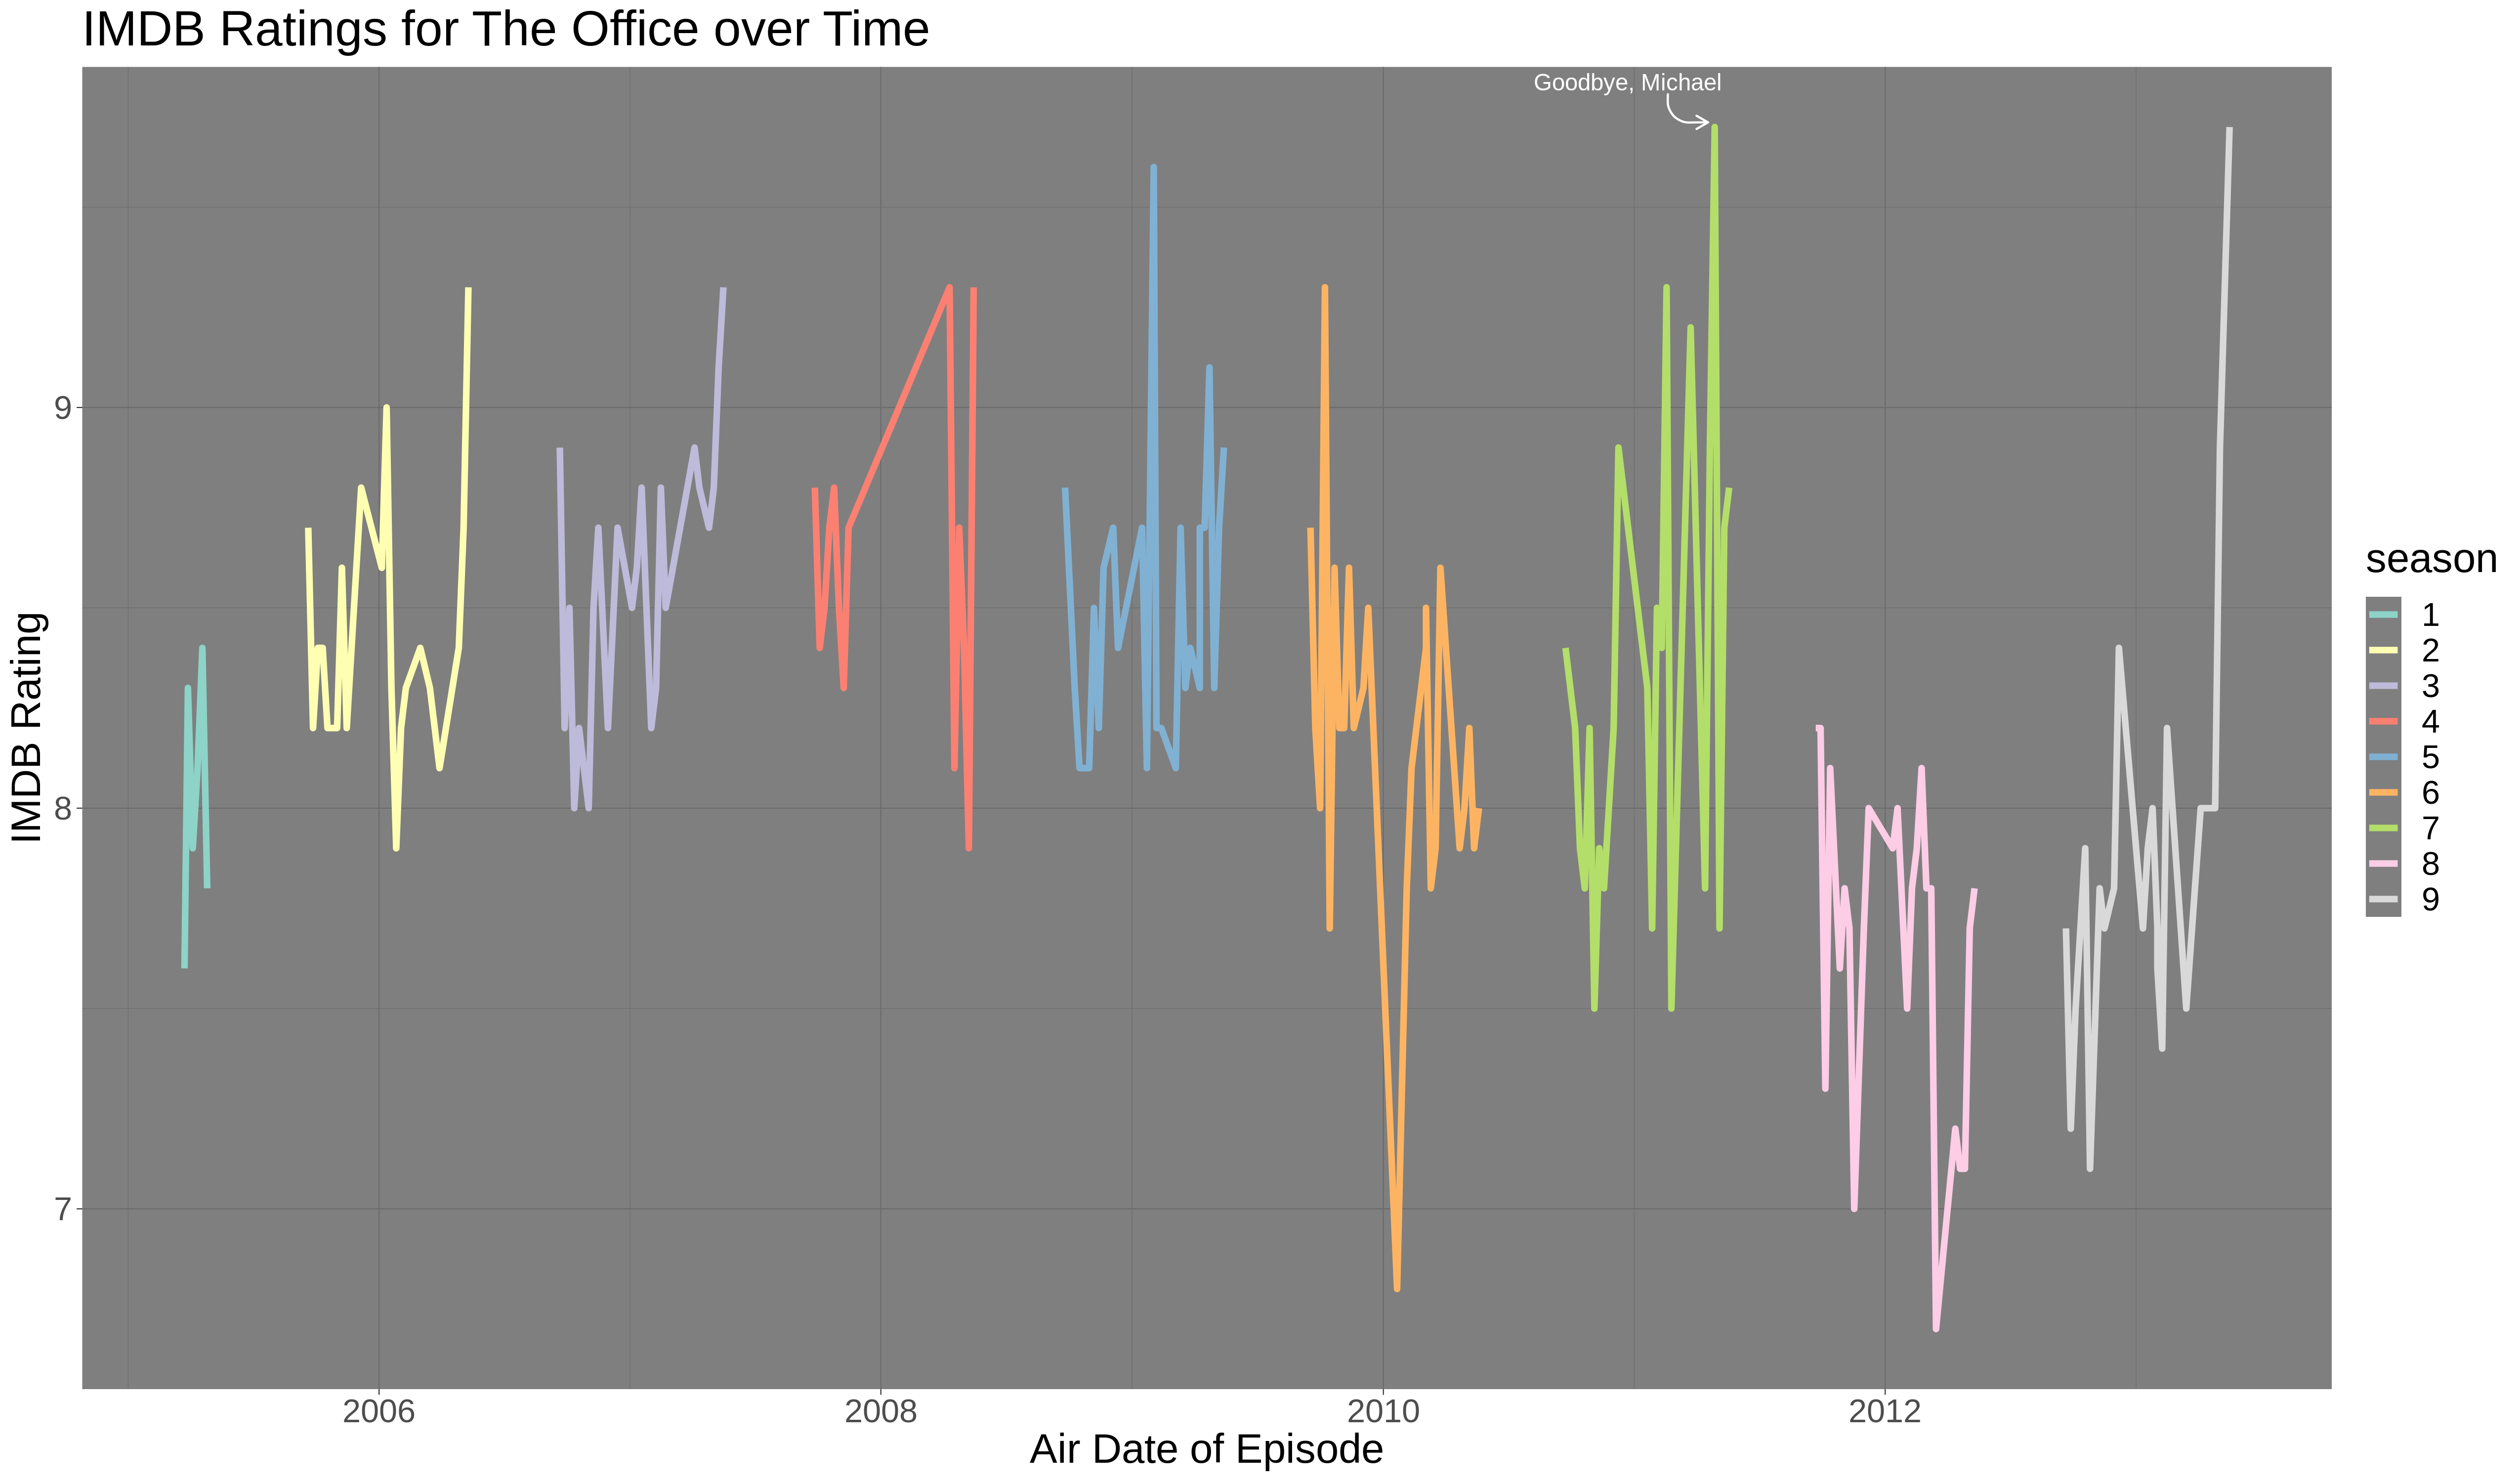

In [62]:
#making the line graph
options(repr.plot.width = 17,repr.plot.height = 10)

p = ggplot(theoffice, aes(x = air_date, y = imdb_rating, color = season, label = title))
p = p + geom_line(size = 1.5) + scale_color_brewer(palette="Set3") 

#adding in label to indicate the episode in which Michael leaves
p = p + geom_text_repel(data = theoffice  %>% filter(title == "Goodbye, Michael"),
                        nudge_x = -0.05, segment.size = 0.5, size = 4,hjust = "right",color = "white",
                        nudge_y = 0.2, segment.curvature = 0.6,segment.ncp = 3,
                        segment.angle = 90,arrow = arrow(length = unit(0.01, "npc") ),
                        point.padding = 0.5)
# changing formating 
p = p + theme_dark()
p = p + labs(x = "Air Date of Episode", 
             y = "IMDB Rating",
             title = "IMDB Ratings for The Office over Time" )
p  = p + theme(text = element_text(size = 20))
p

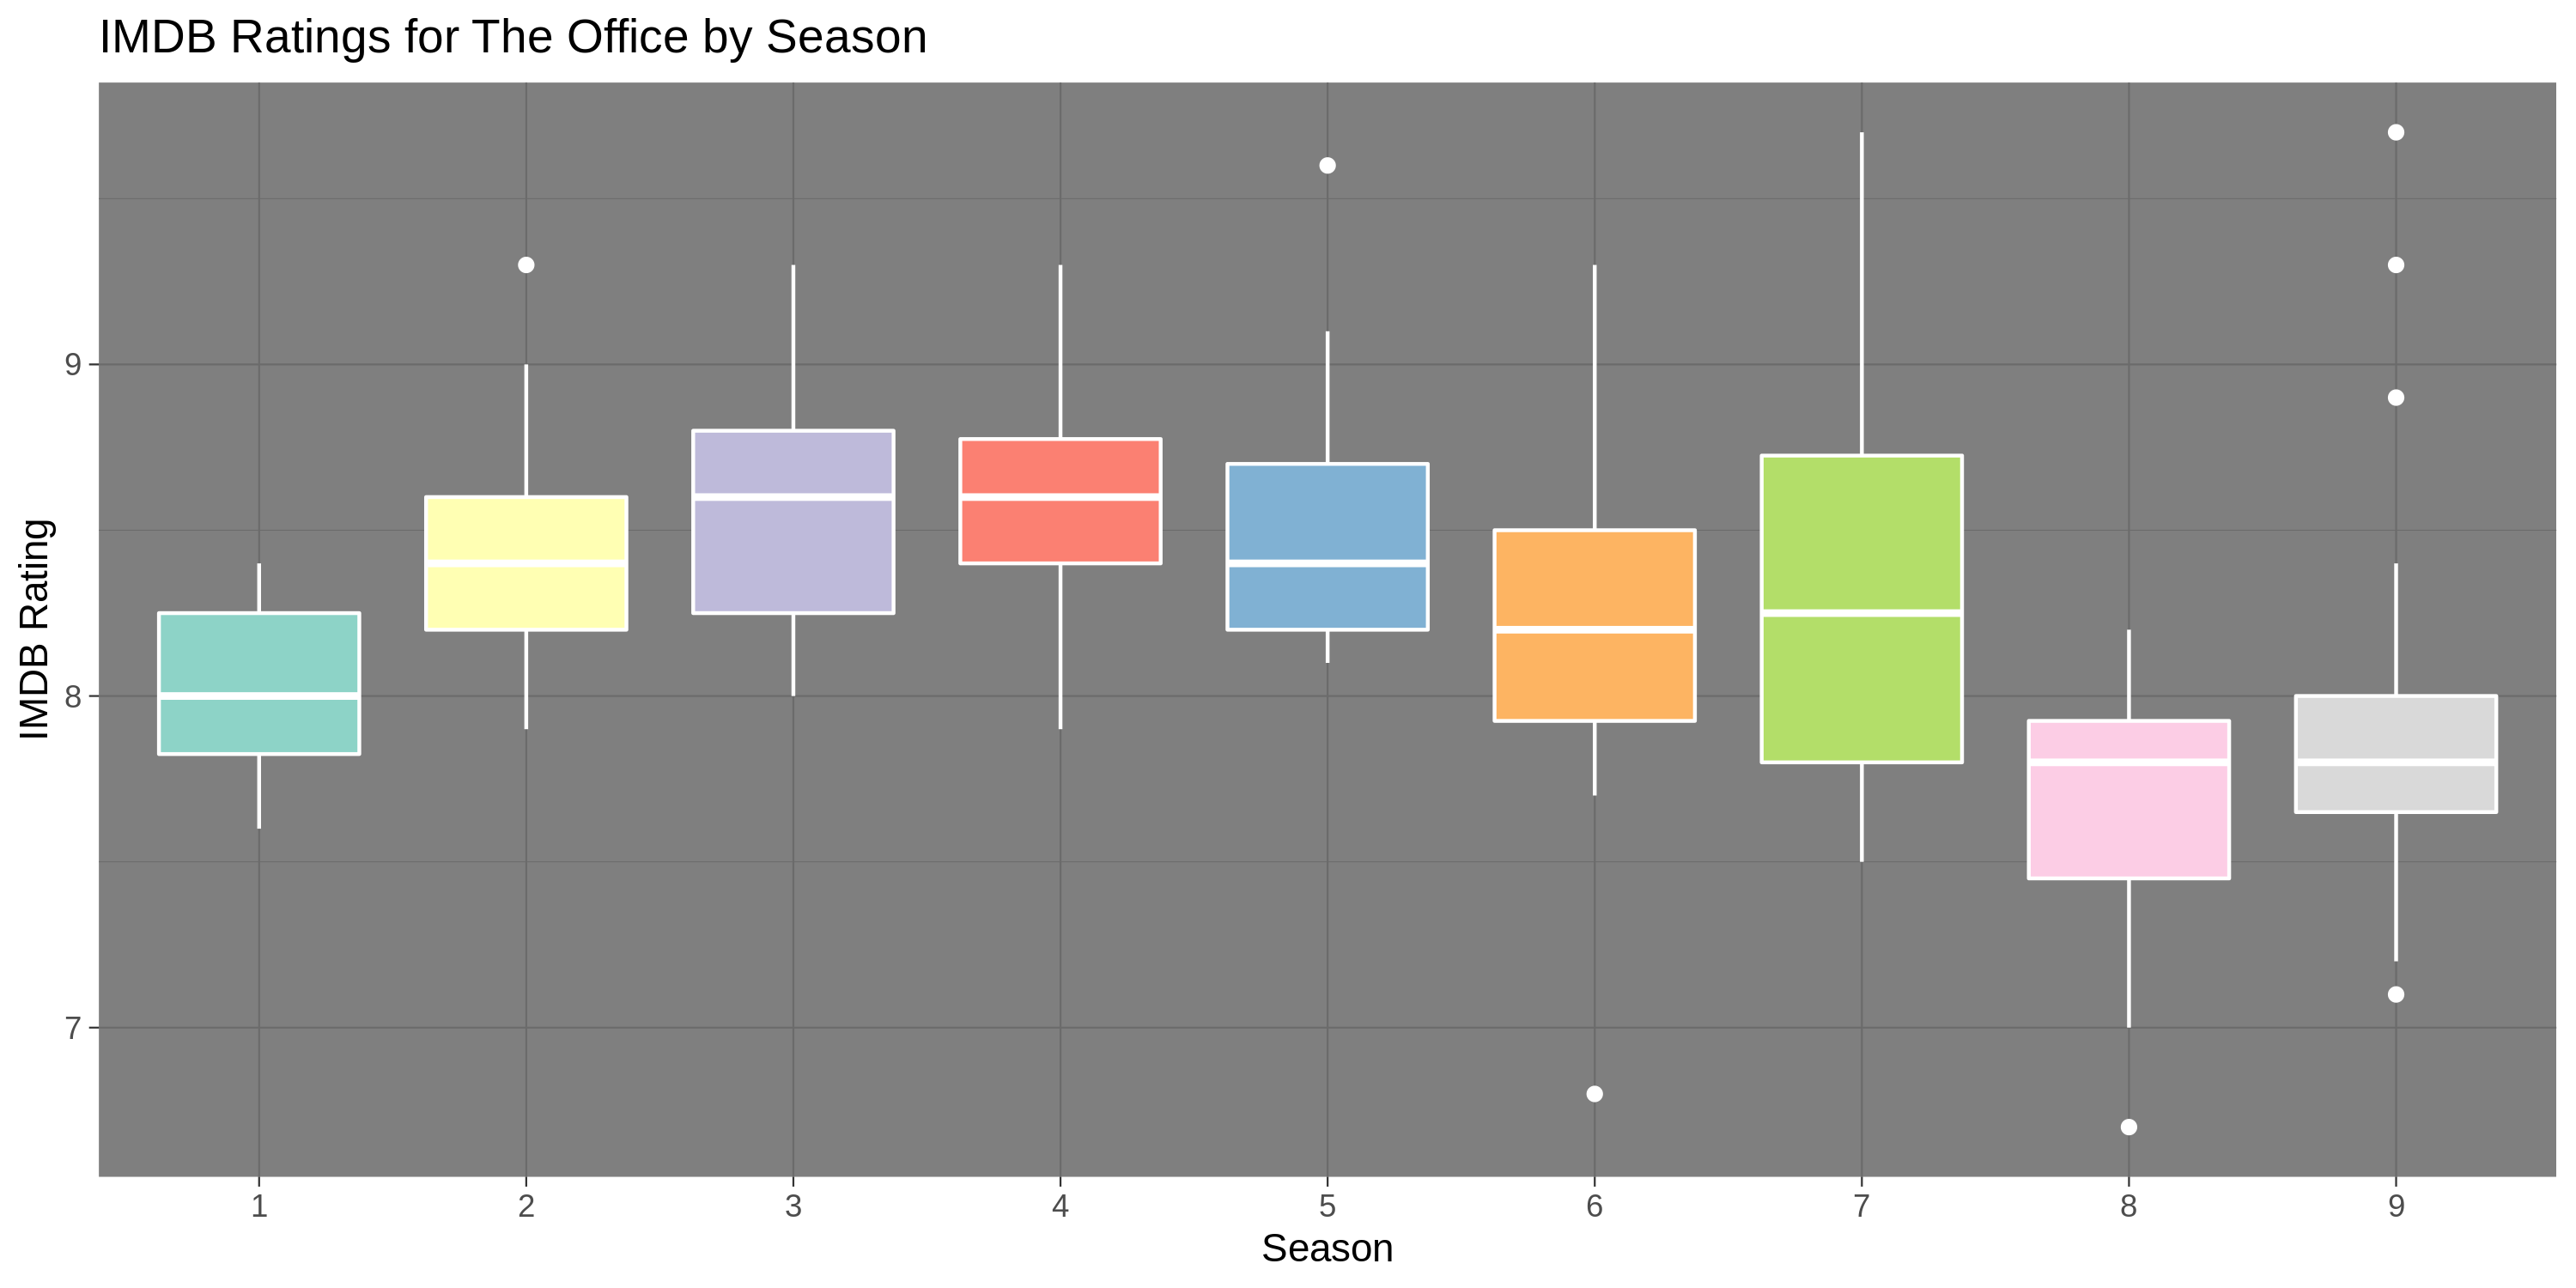

In [66]:
# making the boxplot by seasons
options(repr.plot.width = 10)

p = ggplot(theoffice, aes(x = season, y = imdb_rating, fill=season))

p = p + geom_boxplot(color = "White") + scale_fill_brewer(palette="Set3") 

#formatting
p = p + theme_dark()
p = p + labs(x = "Season", 
             y = "IMDB Rating",
             title = "IMDB Ratings for The Office by Season " )
p = p + theme(legend.position = "None")
p

In [64]:
# find out the air_date of Michael leaving to filter by
theoffice_michaelleaves = theoffice  %>% filter(title == "Goodbye, Michael")
print (theoffice_michaelleaves)

# A tibble: 1 × 6
  season episode title            imdb_rating total_votes air_date  
  <chr>    <dbl> <chr>                  <dbl>       <dbl> <date>    
1 7           21 Goodbye, Michael         9.7        5749 2011-04-28


In [41]:
# add a new variable to show if Michael was in it or not and then find the average rating for each 
theoffice_grouped = theoffice  %>% 
                    mutate( michael = ifelse( air_date <="2011-04-28" , "Present", "Not Present" ))  %>% 
                    group_by(michael)  %>% 
                    summarize(aver_rating = mean(imdb_rating))

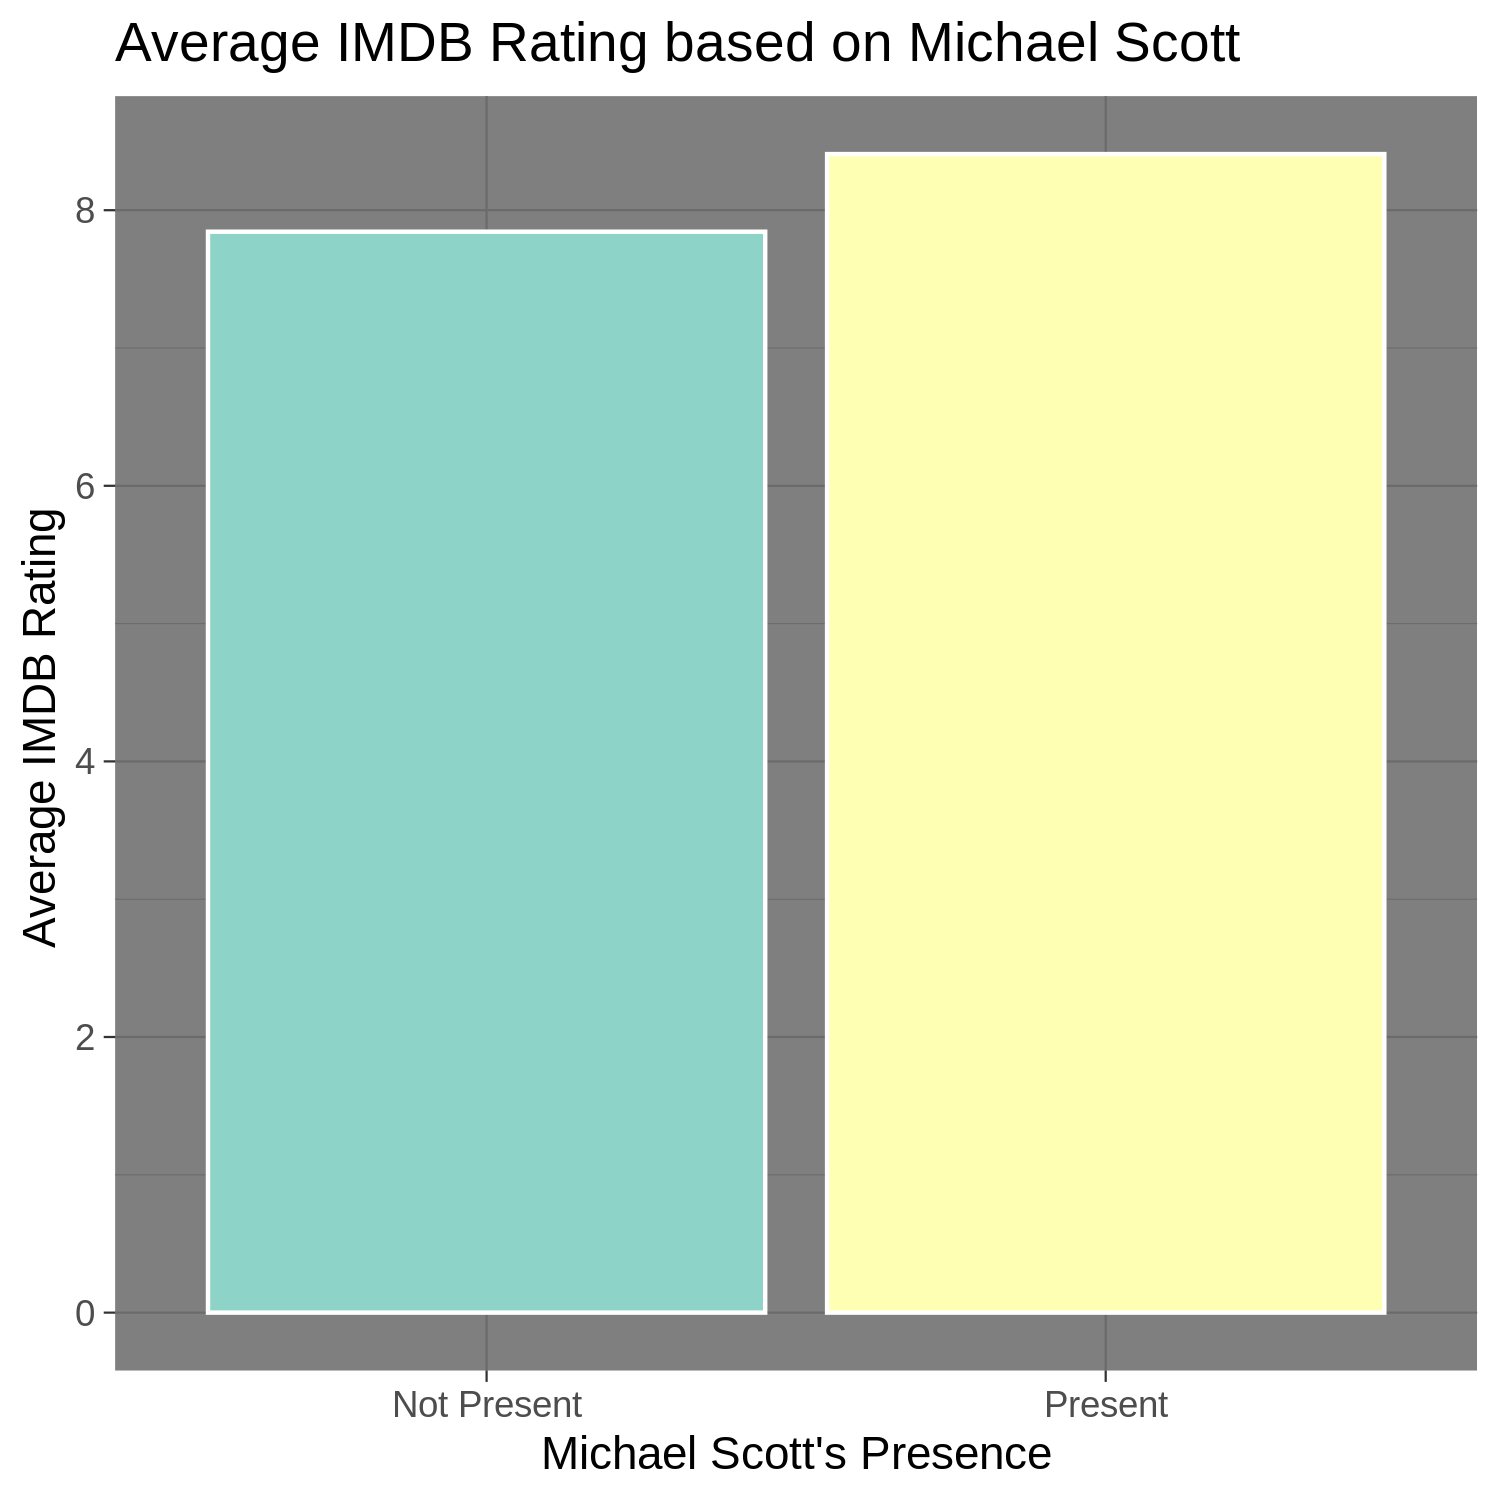

In [65]:
# show the findings of ratings 
options(repr.plot.width = 5,repr.plot.height = 5)

p = ggplot(theoffice_grouped,aes(x = michael, y = aver_rating, fill = michael))
p = p + geom_col(color = "white") + scale_fill_brewer(palette="Set3") 

#formatting
p = p + theme_dark()
p = p + labs(x = "Michael Scott's Presence", 
             y = " Average IMDB Rating",
             title = "Average IMDB Rating based on Michael Scott" )
p = p + theme(legend.position = "None")
p

As we can see based off the final graph, episodes that included Michael as regional manager had a higher rating, on average, than episodes that did not. There is a difference of about 1 point out of a total of 10. In addition, we can see from the "IMDB Ratings for The Office by Season", that season 8 and 9 (seasons without Michael) had lower median ratings than earlier seasons. But there were many outliers in season 9. These outliers in season 9 could be bringing up the average IMDB rating for episodes in which Michael isn't in. Overall, it seems that The Office had a peak in ratings during season 3 and 4 and then slowly declined until the finale. However, there are highly rated outliers in the later seasons that bring up average ratings for seasons. And it seems like IMDB voters prefered episodes with Michael rather than without.